## Load all files (CSV, JSON)

In [26]:
import pandas as pd

In [45]:
df=pd.read_csv('big_mart_sales.csv')

In [47]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [49]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [51]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [53]:
jsn=pd.read_json('simple.json',lines=True)
print(jsn)

       name  age grade
0     Andew   12     A
1    Bhuvan   18     B
2   Clinton   11     A
3     Drake   12     C
4     Eisha   13     B
5    Farhan   22     C
6    Garima   11     A
7  Himanshu   19     A
8    Ishaan   10     D
9     Jason    9     B


##  Perform at least 3 subsetting operations

###  1) Position-Based: First 5 rows, columns 0,1,3

In [57]:
sub_st=df.iloc[:5,[0,1,3]]
print(sub_st)

  Item_Identifier  Item_Weight  Item_Visibility
0           FDA15         9.30         0.016047
1           DRC01         5.92         0.019278
2           FDN15        17.50         0.016760
3           FDX07        19.20         0.000000
4           NCD19         8.93         0.000000


### 2) Label-Based: Filter rows where Outlet_Identifier == 'OUT049'

In [60]:
lbd=df[df['Outlet_Identifier']=='OUT049']

In [62]:
print(lbd.head())

   Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0            FDA15          9.3          Low Fat         0.016047   
2            FDN15         17.5          Low Fat         0.016760   
10           FDY07         11.8          Low Fat         0.000000   
12           FDX32         15.1          Regular         0.100014   
17           FDP49          9.0          Regular         0.069196   

                Item_Type  Item_MRP Outlet_Identifier  \
0                   Dairy  249.8092            OUT049   
2                    Meat  141.6180            OUT049   
10  Fruits and Vegetables   45.5402            OUT049   
12  Fruits and Vegetables  145.4786            OUT049   
17              Breakfast   54.3614            OUT049   

    Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                        1999      Medium               Tier 1   
2                        1999      Medium               Tier 1   
10                       1999      Medium   

### 3) Value-Based: Filter where sales > 5000 and item type is Snacks

In [65]:
flt_based=df[(df['Item_Outlet_Sales']>5000) & (df['Item_Type']=="Snack Foods")]

In [67]:
print(flt_based.head())

    Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
55            FDK21        7.905          Low Fat         0.010053   
333           FDN58          NaN          Regular         0.056597   
373           FDX09        9.000          Low Fat         0.065237   
406           FDF22        6.865          Low Fat         0.056919   
640           FDC46          NaN          Low Fat         0.115978   

       Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
55   Snack Foods  249.0408            OUT018                       2009   
333  Snack Foods  230.9984            OUT027                       1985   
373  Snack Foods  176.4370            OUT035                       2004   
406  Snack Foods  212.8218            OUT049                       1999   
640  Snack Foods  183.4266            OUT027                       1985   

    Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
55       Medium               Tier 3  Supermarket T

## Modify dataset (add column, drop NA, rename)

### Add new column: Estimated Profit = Sales - MRP

In [71]:
df['estimated']=df['Item_Outlet_Sales']-df['Item_MRP']

In [73]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,estimated
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,3485.3288
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,395.1536
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1955.6520
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,550.2850
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,940.8438


### Rename column

In [76]:
df.rename(columns={'Item_Weight':'weight'}, inplace=True)

In [78]:
df.head()

,Item_Identifier,weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,estimated
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,3485.3288
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,395.1536
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1955.6520
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,550.2850
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,940.8438


### Drop missing values

In [81]:
df.dropna(inplace=True)

## Extract insights (top categories, summary stats)

### Top 5 products with highest sales

In [85]:
top_products=df.groupby('Item_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending=False)

In [87]:
print(top_products.head())

Item_Identifier
FDL58    25311.0528
FDY55    24157.8872
FDD44    23962.8078
FDA04    22791.6656
FDB15    22674.4848
Name: Item_Outlet_Sales, dtype: float64


### Find items sold in maximum number of outlets

In [90]:
max_outlet=df.groupby('Item_Identifier')['Outlet_Identifier'].nunique().sort_values(ascending=False)

In [92]:
print(max_outlet)

Item_Identifier
FDD21    5
FDO19    5
FDB12    5
FDB15    5
NCJ30    5
        ..
FDE53    1
FDM12    1
FDE56    1
FDX10    1
FDC52    1
Name: Outlet_Identifier, Length: 1535, dtype: int64


### summary statistics for sales and profit

In [95]:
df['Item_Outlet_Sales'].describe()

count     4650.000000
mean      2272.037489
std       1497.964740
min         69.243200
25%       1125.202000
50%       1939.808300
75%       3111.616300
max      10256.649000
Name: Item_Outlet_Sales, dtype: float64

In [97]:
df['estimated'].describe()

count    4650.000000
mean     2130.321161
std      1456.264238
min        33.521600
25%      1010.033100
50%      1796.295500
75%      2929.943050
max      9995.358000
Name: estimated, dtype: float64

## Visualize at least 1 trend

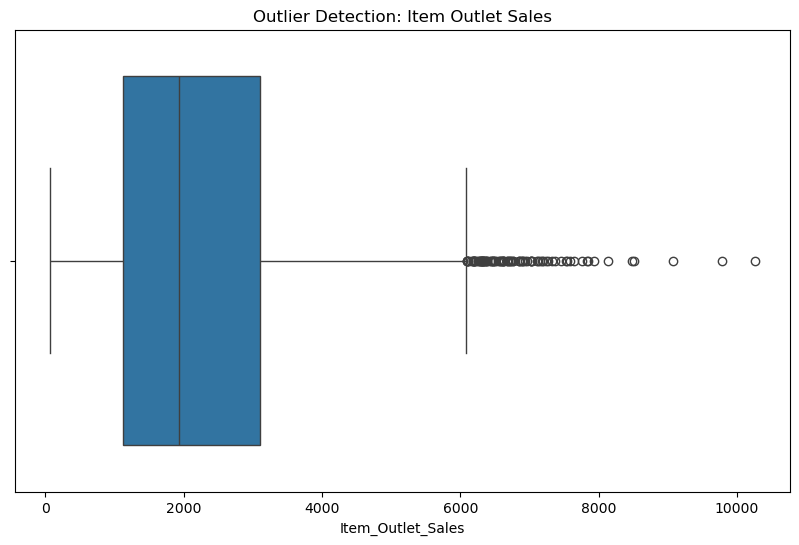

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Item_Outlet_Sales'])
plt.title("Outlier Detection: Item Outlet Sales")
plt.show()